# 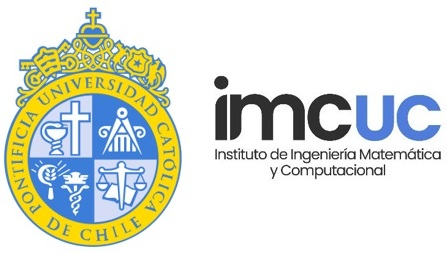  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre:** 2023-2<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Interrogación 2</center></h1>

## Instrucciones

* Esta parte de la Interrogación debe ser desarrollada completamente en lenguaje de programación Python en este Notebook de Jupyter.

* El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. <br>
* La entrega de la interrogación se realizará a través de Canvas en la actividad `I2 Desarrollo`.
* Esta Interrogación debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
* Está **estrictamente prohibido comunicarse con sus compañeros de curso o terceras personas** durante el desarrollo de esta interrogación.
* Puede consultar documentación online y apuntes del curso de todo tipo.
* Habrá sólo dos instancias para hacer preguntas, una al inicio de la prueba y otra a los 30 minutos de avance.<br>


* Ud. dispone de 1 hora para desarrollar esta interrogación.
* Recuerde **guardar frecuentemente sus avances** para evitar pérdidas de trabajo o problemas de envío.<br>

*** 
## Parte 2: Trabajo de Desarrollo (60 min)

Esta parte de la Interrogación es un trabajo práctico con datos. En esta parte, cada pregunta debe ser respondida desarrollando un código por usted que le permita entregar una respuesta. **No se evaluarán respuestas sin código**.

**Para individualizar cada prueba, en la siguiente celda indique su RUT sin puntos ni dígito verificador.**

In [1]:
RUT = 54

En la siguiente celda puede poner las librerías que necesita para ir contestando las siguientes preguntas. No es obligatorio usar esta celda para ello, pero se deja disponible en caso que sea de utilidad. Siéntase libre de agregar celdas en cada pregunta según necesite.

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Datos

Para esta parte de la prueba estaremos usando la base de datos del proyecto "California Cooperative Oceanic Fisheries Investigators" (CalCOFI) que es un programa de investigación marino en California. Puede encontrar más información del programa acá: https://calcofi.org/

En particular, estaremos usando la base "Bottle Database" que posee datos de estudios químicos del océano deade 1949 a la fecha. Puede encontrar los detalles de la base en el siguiente enlace: https://calcofi.org/data/oceanographic-data/bottle-database/

## 1. Limpieza y transformación

Realice las siguientes actividades para terminar con un DataFrames que estén limpios y listos para poder hacer las actividades posteriores.

### (*2 pt*) 1.1 Preparación DataFrame `Bottle`

Cargue los datos del archivo `194903-202105_Bottle.csv` es un DataFrame de pandas llamado `bottleData`. Puede que obtenga un mensaje de error al leer el archivo (dependiendo de su sistema operativo y la configuración). En este caso use el parámetro `encoding = "latin"` como parámetro en la lectura del archivo.

In [3]:
bottleData = pd.read_csv('194903-202105_Bottle.csv', encoding = "latin", low_memory=False)
bottleData.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (*6 pts*) 1.2 Limpieza básica de `bottleData`

En la siguientes celdas (puede agregar celdas si lo necesita) revise el DataFrame realice las siguientes transformaciones:

- Elimine todas las columnas que tengan menos de un 90% de sus muestras como datos no-nulos. Luego, revise las filas y elimne las muestras que tengan algún dato nulo entre sus columnas.
- Identifique y luego eliminar los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna.

In [4]:
# revisamos los datos para ver qué columnas tienen muchos datos nulos o vacíos
bottleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895371 entries, 0 to 895370
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              895371 non-null  int64  
 1   Btl_Cnt              895371 non-null  int64  
 2   Sta_ID               895371 non-null  object 
 3   Depth_ID             895371 non-null  object 
 4   Depthm               895371 non-null  int64  
 5   T_degC               884402 non-null  float64
 6   Salnty               848015 non-null  float64
 7   O2ml_L               725630 non-null  float64
 8   STheta               842675 non-null  float64
 9   O2Sat                690746 non-null  float64
 10  Oxy_µmol/Kg          690698 non-null  float64
 11  BtlNum               138967 non-null  float64
 12  RecInd               895371 non-null  int64  
 13  T_prec               884408 non-null  float64
 14  T_qual               24016 non-null   float64
 15  S_prec           

In [5]:
maxNull = np.ceil(.9*len(bottleData))
print(f'Eliminando las columnas que tienen menos de {maxNull} datos no-nulos\n')

bottleDataClean = bottleData.dropna(axis=1, thresh=maxNull)
bottleDataClean.info()

Eliminando las columnas que tienen menos de 805834.0 datos no-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895371 entries, 0 to 895370
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cst_Cnt   895371 non-null  int64  
 1   Btl_Cnt   895371 non-null  int64  
 2   Sta_ID    895371 non-null  object 
 3   Depth_ID  895371 non-null  object 
 4   Depthm    895371 non-null  int64  
 5   T_degC    884402 non-null  float64
 6   Salnty    848015 non-null  float64
 7   STheta    842675 non-null  float64
 8   RecInd    895371 non-null  int64  
 9   T_prec    884408 non-null  float64
 10  S_prec    847984 non-null  float64
 11  NH3q      832507 non-null  float64
 12  C14A1q    877994 non-null  float64
 13  C14A2q    878012 non-null  float64
 14  DarkAq    869829 non-null  float64
 15  MeanAq    869828 non-null  float64
 16  R_Depth   895370 non-null  float64
 17  R_TEMP    849317 non-null  float64
 18  R_Sal     84256

In [6]:
bottleDataClean = bottleDataClean.dropna(axis=0, how='any')
bottleDataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756937 entries, 0 to 895370
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cst_Cnt   756937 non-null  int64  
 1   Btl_Cnt   756937 non-null  int64  
 2   Sta_ID    756937 non-null  object 
 3   Depth_ID  756937 non-null  object 
 4   Depthm    756937 non-null  int64  
 5   T_degC    756937 non-null  float64
 6   Salnty    756937 non-null  float64
 7   STheta    756937 non-null  float64
 8   RecInd    756937 non-null  int64  
 9   T_prec    756937 non-null  float64
 10  S_prec    756937 non-null  float64
 11  NH3q      756937 non-null  float64
 12  C14A1q    756937 non-null  float64
 13  C14A2q    756937 non-null  float64
 14  DarkAq    756937 non-null  float64
 15  MeanAq    756937 non-null  float64
 16  R_Depth   756937 non-null  float64
 17  R_TEMP    756937 non-null  float64
 18  R_Sal     756937 non-null  float64
 19  R_DYNHT   756937 non-null  float64
dtypes: float6

In [7]:
bottleDataClean[bottleDataClean.duplicated()]

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT


In [8]:
bottleDataClean.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,233.0,0.00
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,232.5,0.01
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,232.8,0.02
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,234.1,0.04
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,234.0,0.04


Vemos que la base no presenta datos duplicados ni tampoco hay errores en el tipo de variable de cada columna que ha quedado.

### (*2 pt*) 1.3 Preparación DataFrame `Cast`

Cargue los datos del archivo `194903-202105_Cast.csv` es un DataFrame de pandas llamado `castData`. Puede que obtenga un mensaje de error al leer el archivo (dependiendo de su sistema operativo y la configuración). En este caso use el parámetro `encoding = "latin"` como parámetro en la lectura del archivo.

In [9]:
castData = pd.read_csv('194903-202105_Cast.csv', encoding = "latin", low_memory=False)
castData.head(5)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


### (*5 pts*) 1.4 Limpieza básica de `castData`

Al igual que con el DataFrame `bottleData`, revise el DataFrame nuevo y realice las siguientes transformaciones:

- Elimine todas las columnas que tengan algún dato no-nulo entre sus muestras.
- Identifique y luego eliminar los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna.

In [10]:
# revisamos los datos para ver qué columnas tienen datos nulos o vacíos
castData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35644 entries, 0 to 35643
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      35644 non-null  int64  
 1   Cruise_ID    35644 non-null  object 
 2   Cruise       35644 non-null  int64  
 3   Cruz_Sta     35644 non-null  int64  
 4   DbSta_ID     35644 non-null  int64  
 5   Cast_ID      35644 non-null  object 
 6   Sta_ID       35644 non-null  object 
 7   Quarter      35644 non-null  int64  
 8   Sta_Code     35644 non-null  object 
 9   Distance     20954 non-null  float64
 10  Date         35644 non-null  object 
 11  Year         35644 non-null  int64  
 12  Month        35644 non-null  int64  
 13  Julian_Date  35644 non-null  int64  
 14  Julian_Day   35644 non-null  int64  
 15  Time         35320 non-null  object 
 16  Lat_Dec      35644 non-null  float64
 17  Lat_Deg      35644 non-null  int64  
 18  Lat_Min      35644 non-null  float64
 19  Lat_

In [11]:
castDataClean = castData.dropna(axis=1, how='any')
castDataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35644 entries, 0 to 35643
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      35644 non-null  int64  
 1   Cruise_ID    35644 non-null  object 
 2   Cruise       35644 non-null  int64  
 3   Cruz_Sta     35644 non-null  int64  
 4   DbSta_ID     35644 non-null  int64  
 5   Cast_ID      35644 non-null  object 
 6   Sta_ID       35644 non-null  object 
 7   Quarter      35644 non-null  int64  
 8   Sta_Code     35644 non-null  object 
 9   Date         35644 non-null  object 
 10  Year         35644 non-null  int64  
 11  Month        35644 non-null  int64  
 12  Julian_Date  35644 non-null  int64  
 13  Julian_Day   35644 non-null  int64  
 14  Lat_Dec      35644 non-null  float64
 15  Lat_Deg      35644 non-null  int64  
 16  Lat_Min      35644 non-null  float64
 17  Lat_Hem      35644 non-null  object 
 18  Lon_Dec      35644 non-null  float64
 19  Lon_

In [12]:
castDataClean[castDataClean.duplicated()]

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Date,...,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Cruz_Num


In [13]:
castDataClean.loc[:,'Date'] = castDataClean['Date'].astype('datetime64[ns]')
castDataClean.loc[:,'Lat_Hem'] = castDataClean['Lat_Hem'].astype('category')
castDataClean.loc[:,'Lon_Hem'] = castDataClean['Lon_Hem'].astype('category')

In [14]:
castDataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35644 entries, 0 to 35643
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      35644 non-null  int64  
 1   Cruise_ID    35644 non-null  object 
 2   Cruise       35644 non-null  int64  
 3   Cruz_Sta     35644 non-null  int64  
 4   DbSta_ID     35644 non-null  int64  
 5   Cast_ID      35644 non-null  object 
 6   Sta_ID       35644 non-null  object 
 7   Quarter      35644 non-null  int64  
 8   Sta_Code     35644 non-null  object 
 9   Date         35644 non-null  object 
 10  Year         35644 non-null  int64  
 11  Month        35644 non-null  int64  
 12  Julian_Date  35644 non-null  int64  
 13  Julian_Day   35644 non-null  int64  
 14  Lat_Dec      35644 non-null  float64
 15  Lat_Deg      35644 non-null  int64  
 16  Lat_Min      35644 non-null  float64
 17  Lat_Hem      35644 non-null  object 
 18  Lon_Dec      35644 non-null  float64
 19  Lon_

In [15]:
castDataClean.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Year,Month,Julian_Date,Julian_Day,Lat_Dec,...,Lat_Min,Lon_Dec,Lon_Deg,Lon_Min,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta
count,35644.000000,35644.000000,3.564400e+04,3.564400e+04,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,...,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000
mean,17822.500000,197561.253816,1.975613e+13,9.301021e+06,2.366569,1975.554511,5.824543,27387.628745,161.024268,31.842022,...,29.784613,-119.789962,-119.281590,30.502302,93.005361,93.217756,93.014909,62.088220,62.087796,61.665683
std,10289.680834,2105.321976,2.105317e+11,2.188920e+06,1.093174,21.054396,3.332910,7057.676228,100.994242,3.611603,...,17.245584,3.943508,3.958021,17.296881,21.889624,28.305447,21.937915,32.795436,32.793376,33.125400
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,1949.000000,1.000000,17957.000000,2.000000,18.416666,...,0.000000,-164.083333,-164.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.500000,-30.600000
25%,8911.750000,195706.000000,1.957061e+13,8.001470e+06,1.000000,1957.000000,3.000000,20987.000000,74.000000,29.841666,...,14.731750,-122.075417,-122.000000,16.000000,80.000000,80.000000,80.400000,40.000000,40.000000,40.000000
50%,17822.500000,197202.000000,1.972021e+13,9.000700e+06,2.000000,1972.000000,6.000000,26346.000000,156.000000,32.428333,...,29.100000,-119.663333,-119.000000,30.300000,90.000000,90.000000,90.000000,55.000000,55.000000,55.100000
75%,26733.250000,199101.000000,1.991011e+13,1.033080e+07,3.000000,1991.000000,9.000000,33259.250000,246.000000,33.833333,...,45.000000,-117.516666,-117.000000,46.000000,103.300000,103.000000,103.400000,80.000000,80.000000,79.900000
max,35644.000000,202105.000000,2.021051e+13,1.767030e+07,4.000000,2021.000000,12.000000,44329.000000,354.000000,47.916666,...,59.900000,-105.966666,-105.000000,59.994000,176.700000,1734.000000,176.500000,531.100000,531.000000,531.100000


### (*5 pts*) 1.5 Base consolidada `oceanData`

El DataFrame `bottleData` tiene la información de los resultados del análisis de cada botella de muestras recogidas en cada una de las activiades de toma de muestra. Cada muestra está enumerada en la columna `Btl_Cnt` con un ID único. Por otra parte, la columna `Cst_Cnt` tiene el ID del viaje en el cual se lanzó y se tomó la muestra en esa botella.

El DataFrame `castData` tiene los metadatos de cada viaje. La columna `Cst_Cnt` muestra el ID del viaje y el resto de las columnas nos indican el tipo de barco usado, fecha del viaje, posición, y otras cosas relevantes. Lo importante es que la columna `Cst_Cnt` posee el ID del viaje y nos permite conectar ambas bases de datos.

Aprovechando esto, genere un único DataFrame llamado `oceanData` que tenga toda la información de `bottleData`, pero agregando en cada fila, los siguientes datos relevantes del viaje:

['Date', 'Year', 'Month', 'Lat_Dec', 'Lon_Dec', 'Lat_Hem', 'Lon_Hem']

In [16]:
oceanData = bottleDataClean.merge(castDataClean[['Cst_Cnt', 'Date', 'Year', 'Month', 'Lat_Dec', 'Lon_Dec', 'Lat_Hem', 'Lon_Hem']], how='left', left_on='Cst_Cnt', right_on='Cst_Cnt')
oceanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756937 entries, 0 to 756936
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cst_Cnt   756937 non-null  int64  
 1   Btl_Cnt   756937 non-null  int64  
 2   Sta_ID    756937 non-null  object 
 3   Depth_ID  756937 non-null  object 
 4   Depthm    756937 non-null  int64  
 5   T_degC    756937 non-null  float64
 6   Salnty    756937 non-null  float64
 7   STheta    756937 non-null  float64
 8   RecInd    756937 non-null  int64  
 9   T_prec    756937 non-null  float64
 10  S_prec    756937 non-null  float64
 11  NH3q      756937 non-null  float64
 12  C14A1q    756937 non-null  float64
 13  C14A2q    756937 non-null  float64
 14  DarkAq    756937 non-null  float64
 15  MeanAq    756937 non-null  float64
 16  R_Depth   756937 non-null  float64
 17  R_TEMP    756937 non-null  float64
 18  R_Sal     756937 non-null  float64
 19  R_DYNHT   756937 non-null  float64
 20  Date

In [17]:
pd.set_option('display.max_columns', None)
oceanData.head(1)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT,Date,Year,Month,Lat_Dec,Lon_Dec,Lat_Hem,Lon_Hem
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.5,233.0,0.0,1949-03-01 00:00:00,1949,3,38.833333,-124.083333,N,W


## 2. EDA

Explore los tres DataFrames de la Pregunta 1, haciendo las siguientes actividades. Cada estudiante tendrá un año de análisis diferente dependiendo de su RUT. Para definir el año que le toca a usted, ejecute la siguiente celda que entrega en la variable `studentYear` el año que le toca a usted revisar.

In [18]:
studentYear = oceanData['Year'].unique()[RUT%len(oceanData['Year'].unique())]
studentYear

2004

### (*2 pts*) 2.1 Filtrando datos

Genere un DataFrame nuevo, llamado `oceanStudent` que tenga las muestras tomadas sólo en el año que le tocó a usted. Adicionalmente deje sólo las siguientes columnas en su DataFrame:

['Depthm', 'T_degC', 'Salnty', 'STheta']

In [19]:
oceanStudent = oceanData[oceanData['Year'] == studentYear]
oceanStudent = oceanStudent[['Depthm', 'T_degC', 'Salnty', 'STheta']]
oceanStudent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7142 entries, 689426 to 696567
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depthm  7142 non-null   int64  
 1   T_degC  7142 non-null   float64
 2   Salnty  7142 non-null   float64
 3   STheta  7142 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 279.0 KB


### (*5 pts*) 2.2 EDA sobre un año de datos

Analice el DataFrame `oceanStudent` mostrando lo siguiente:
- Un `heatmap` que muestra la correlación entre las diferentes variables numéricas. ¿Cuáles son las variables que parecen más correlacionadas (positiva y negativamente).
- Un gráfico de pares que muestre un histograma de cada variable y un scatter plot entre cada par de variables.



<Axes: >

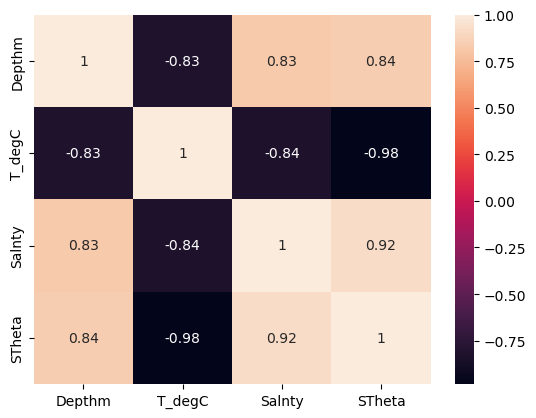

In [20]:
sns.heatmap(oceanStudent.corr(numeric_only=True), annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


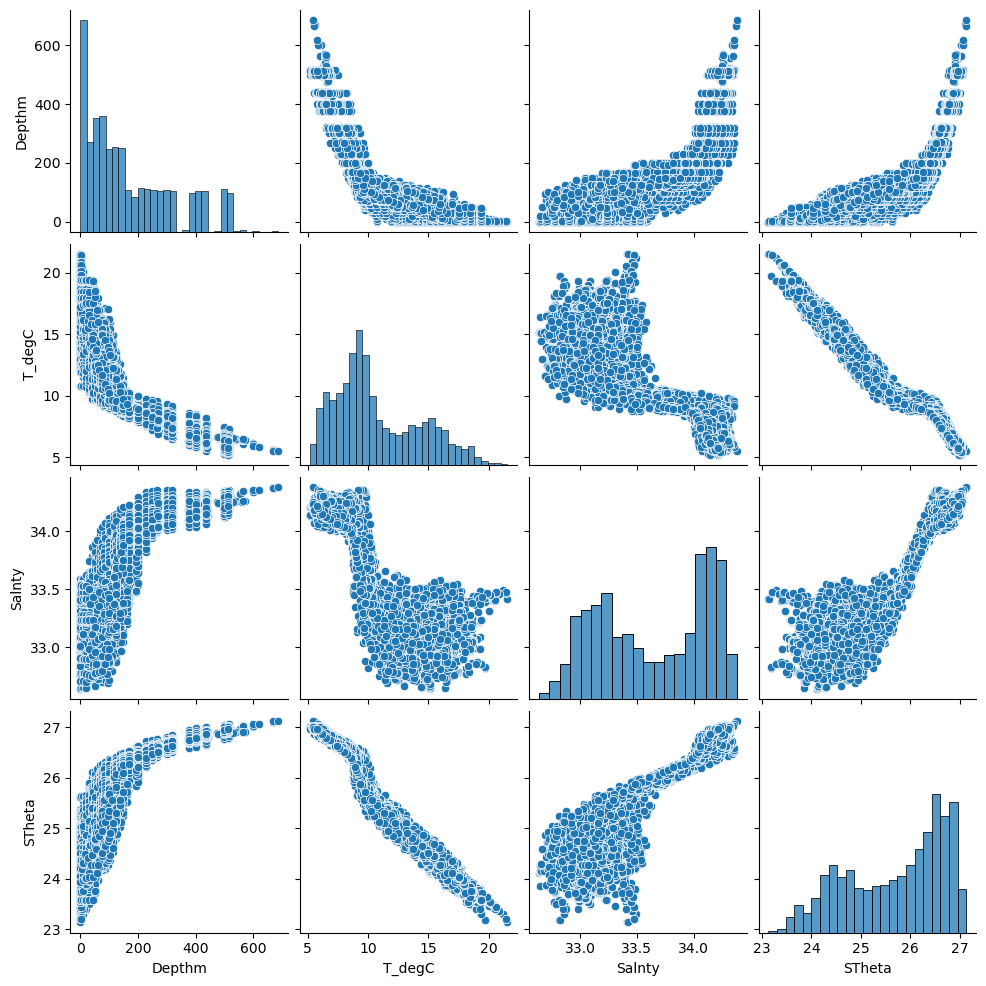

In [21]:
sns.pairplot(oceanStudent)

### (*5 pts*) 2.3 EDA con sentido

El análisis anterior nos muestra que al parecer hay relaciones directas entre las diferentes variables medidas. En particular, parece que podríamos encontrar una relación que nos permitiera identificar la salinidad del agua si conocemos la temperatura (`T_degC`), la profundidad (`Depthm`) y la densidad potencial (`STheta`).

Haga dos scatter plots donde la variable independiente sea la Temperatura, la variable dependiente sea la Salinidad y el color (`hue`) dependa de la profundidad en el primer gráfico y de la densidad potencial en el segundo gráfico.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


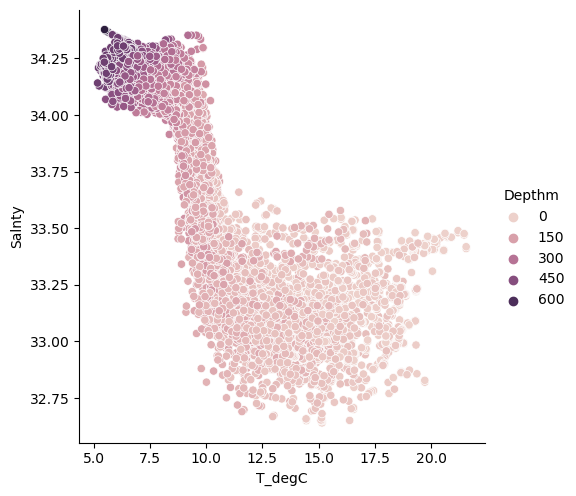

In [22]:
sns.pairplot(data=oceanStudent, y_vars='Salnty', x_vars='T_degC', hue='Depthm', height=5)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


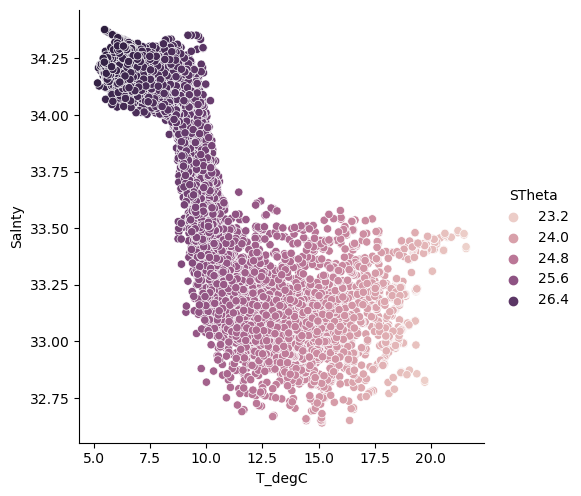

In [23]:
sns.pairplot(data=oceanStudent, y_vars='Salnty', x_vars='T_degC', hue='STheta', height=5)

## 3. Aprendiendo relaciones

En esta pregunta usaremos herramientas de ML para ver si podemos identificar la relación que hay entre la salinidad del agua y las otras variables que estamos midiendo. Puede usar la librería de su preferencia para realizar las siguientes actividades.

Dado que esta es una Interrogación y no tenemos mucho tiempo, para esta sección no necesita hacer validación cruzada; sólo separar una única vez entre datos de prueba y entrenamiento y usar eso para contestar las preguntas.

### (*5 pts*) 3.1 Preparando los datos

El primer paso para todo proceso de aprendizaje de máquinas es separar los datos entre un conjunto de entrenamiento y otro de prueba. A partir de su DataFrame `oceanStudent` genere dos conjuntos de datos, uno de entrenamiento y otro de prueba. Asegure que el conjunto de prueba tenga un 25% de las muestras.

Haga un scatter plot de temperatura vs salinidad que muestre en colores diferentes el conjunto de entrenamiento y el de prueba.

In [24]:
# libreria de separación
from sklearn.model_selection import train_test_split

#Dividimos el dataframe de entrada
train, test = train_test_split(oceanStudent, test_size=0.25, random_state=2)

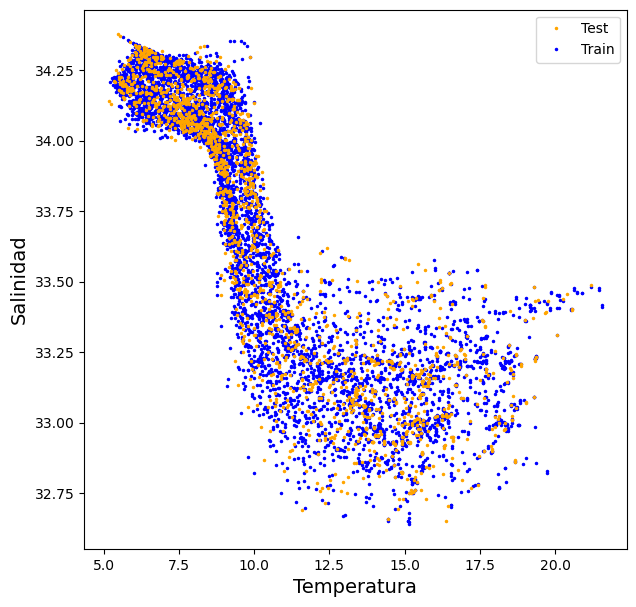

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.plot(test['T_degC'], test['Salnty'], '.', markersize=3, color='orange', zorder=1, label='Test')
plt.plot(train['T_degC'], train['Salnty'], '.', markersize=3, color='blue', zorder=0, label='Train')
ax.set_xlabel('Temperatura',fontsize=14)
ax.set_ylabel('Salinidad',fontsize=14)
ax.legend()

### (*10 pts*) 3.2 Regresión Lineal

Entrene un modelo de regresión lineal que conecte salinidad con temperatura (**sólo esas dos variables**). Calcule el RMSE, R² y grafique el modelo resultante junto a los datos de entrenamiento y prueba.

In [26]:
# ajustamos los datos para poder usarlo en un modelo en sklearn
y_train = np.array(train['Salnty'])
y_test = np.array(test['Salnty'])

X_train = np.array(train['T_degC'])
X_train = X_train.reshape(X_train.shape[0], 1)

X_test = np.array(test['T_degC'])
X_test = X_test.reshape(X_test.shape[0], 1)

In [27]:
# realizar modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
# calculo de funcionamiento
y_pred_train = linreg.predict(X_train)
r2_lineal_train = linreg.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train)

print('\nMétricas de Entrenamiento')
print(f'r^2 : {r2_lineal_train}')
print(f'RMSE {rmse_train}')
print(f'Coeficientes: {linreg.coef_[0], linreg.intercept_}')

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
r2_lineal_test = linreg.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

print('\nMétricas de Prueba')
print(f'r^2 : {r2_lineal_test}')
print(f'RMSE {rmse_test}')


Métricas de Entrenamiento
r^2 : 0.6935782969563518
RMSE 0.07102708011691519
Coeficientes: (-0.11313084439176684, 34.85793580692675)

Métricas de Prueba
r^2 : 0.7128758739427838
RMSE 0.06649379726585274


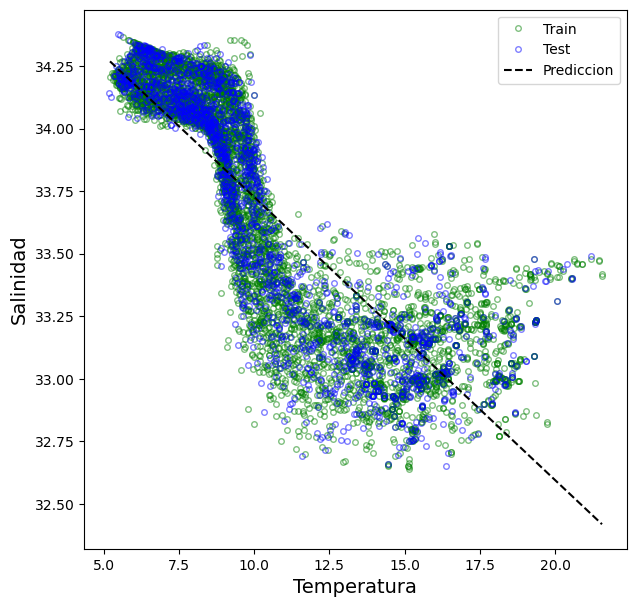

In [29]:
fig1, ax = plt.subplots(1,1, figsize=(7,7))

ax.plot(train['T_degC'], train['Salnty'],'o', markersize=4, mec='green', mfc='None', label='Train', alpha=0.5) 
ax.plot(test['T_degC'], test['Salnty'],'o', markersize=4, mec='blue', mfc='None', label='Test', alpha=0.5) 

xgrid = np.linspace(np.min(train['T_degC']), np.max(train['T_degC']), 100)
ax.plot(xgrid, linreg.predict(xgrid.reshape(100, 1)), label='Prediccion', color='k', ls='--')
ax.set_xlabel('Temperatura', fontsize=14)
ax.set_ylabel('Salinidad', fontsize=14)
ax.legend()

### (*15pts*) 3.3 Regresión Polinomial

Dada la aparente relación nolineal entre las variables, suena lógico probar con modelos de regresión polinomial para conectar temperatura y salinidad.

Haga modelos de regresión de polinomial de grados 1, 2, 3, 5, 8, 10 y 12 y muestre los dos siguientes gráficos:
- Un gráfico que muestre los datos y los 6 modelos de regresión entrenados.
- Un gráfico que muestre el RMSE de entrenamiento y de prueba con respecto al grado del polinomio del modelo de regresión.
- ¿Cuál de los modelos eligiría? Justifique su respuesta.

In [30]:
# función para evaluar modelos no lineales
def predict_model(poly_model, x_vals, poly_transformer=None):

    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = poly_model.predict(dm)
    
    return(prediction)

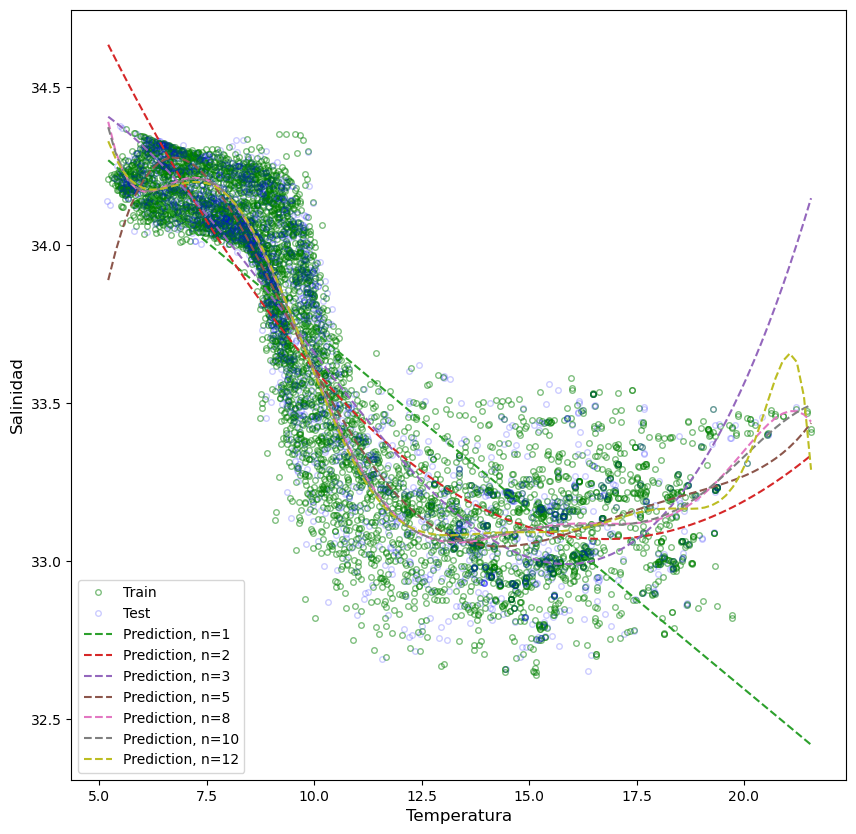

In [31]:
# librería de modelos polinomiales
from sklearn.preprocessing import PolynomialFeatures

# comenzar con la figura con los datos
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(train['T_degC'], train['Salnty'],'o', markersize=4, mec='green', mfc='None', label='Train', alpha=0.5) 
ax.plot(test['T_degC'], test['Salnty'],'o', markersize=4, mec='blue', mfc='None', label='Test', alpha=0.2) 

# grados a probar
polydegree = [1, 2, 3, 5, 8, 10, 12]

# almacenar el RMSE para cada modelo
error_test=[]
error_train=[]

# entrenar y probar cada modelo
for n in polydegree:
    # armar modelo
    transformer = PolynomialFeatures(n, include_bias=False)
    
    # entrenar el modelo
    expanded_train = transformer.fit_transform(X_train)
    reg_poly = LinearRegression().fit(expanded_train, y_train)
    
    # pruebas
    y_pred_train = predict_model(reg_poly, X_train, transformer)
    y_pred_test = predict_model(reg_poly, X_test, transformer)
    
    # calculo de error
    rmse_train = mean_squared_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test)
    # agregar a listas de valores
    error_test.append(rmse_test)
    error_train.append(rmse_train)
    
    # graficar el modelo
    x_vals = np.linspace(np.min(train['T_degC']), np.max(train['T_degC']), 100).reshape(-1,1)
    prediction = predict_model(reg_poly, x_vals, transformer)
    ax.plot(x_vals, prediction, label='Prediction, n=%d'%n, ls='--')

ax.set_xlabel("Temperatura", fontsize=12)
ax.set_ylabel("Salinidad", fontsize=12)
ax.legend()

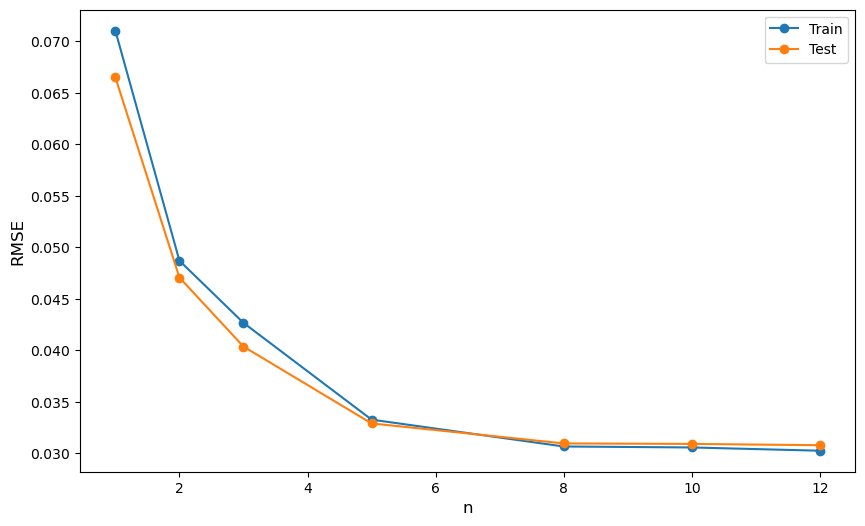

In [32]:
# gráfico de error
fig, ax = plt.subplots(1,1, figsize=(10, 6))

ax.plot(polydegree, error_train, 'o-', label='Train')
ax.plot(polydegree, error_test, 'o-', label='Test')

ax.set_xlabel("n", fontsize=12)
ax.set_ylabel("RMSE", fontsize=12)
ax.legend()

**Respuesta:** Vemos en este último gráfico que, a medida que aumentamos el nivel del polinomio, el error se reduce. Al llegar a n = 12, vemos que el error de entrenamiento continua disminuyendo, pero el de prueba se mantiene lo que indicaría que estaríamos entrando a una zona de "overfitting". Dado esto, la recomendación para este caso particular sería usar un polinomio de grado 8 o 10.

### (*8pts*) 3.4 Regresión Multilineal

Entrene un modelo de regresión multi lineal que conecte salinidad con todas las variables que consideramos independientes: temperatura, profundidad y densidad. 

Calcule el RMSE y R². ¿Mejora el nivel de predicción con respecto a los modelos anteiores? ¿Qué puede decir de la complejidad de los modelos anteriores vs el agregar nuevas variables independientes en un modelo más simple como este?

In [33]:
# ajustamos los datos para poder usarlo en un modelo en sklearn
y_train = np.array(train['Salnty'])
y_test = np.array(test['Salnty'])

X_train = np.array(train[['T_degC', 'Depthm', 'STheta']])
X_test = np.array(test[['T_degC', 'Depthm', 'STheta']])

# creamos y entrenamos el modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# calculo de funcionamiento
y_pred_train = linreg.predict(X_train)
r2_lineal_train = linreg.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train)

print('\nMétricas de Entrenamiento')
print(f'r^2 : {r2_lineal_train}')
print(f'RMSE {rmse_train}')
print(f'Coeficientes: {linreg.coef_[0], linreg.intercept_}')

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
r2_lineal_test = linreg.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

print('\nMétricas de Prueba')
print(f'r^2 : {r2_lineal_test}')
print(f'RMSE {rmse_test}')


Métricas de Entrenamiento
r^2 : 0.9912985929924109
RMSE 0.002016944382591216
Coeficientes: (0.2785990622239573, -3.6430685290835783)

Métricas de Prueba
r^2 : 0.9917104398222142
RMSE 0.0019197423130334177


**Respuesta:** Vemos que en este caso el modelo multilineal mejora aún más el error RMSE, a niveles mucho menores que el mejor de los modelos polinomiales. Esto nos indica que las otras variables independientes tienen un poder predictivo relevante y que mejora más que agregar complejidad a un modelo de una sola variable independiente.